# Exploring the cleaned data

Imports.

In [2]:
import math

import matplotlib.pyplot as plt
import pandas as pd

Pathing to the data.

In [3]:
data_path = '../data'
clean_data_path = f'{data_path}/csv/clean'

Open cleaned data.

In [4]:
matches_df = pd.read_csv(f'{clean_data_path}/bundesliga_matches.csv')

## Amount of matches played by each team

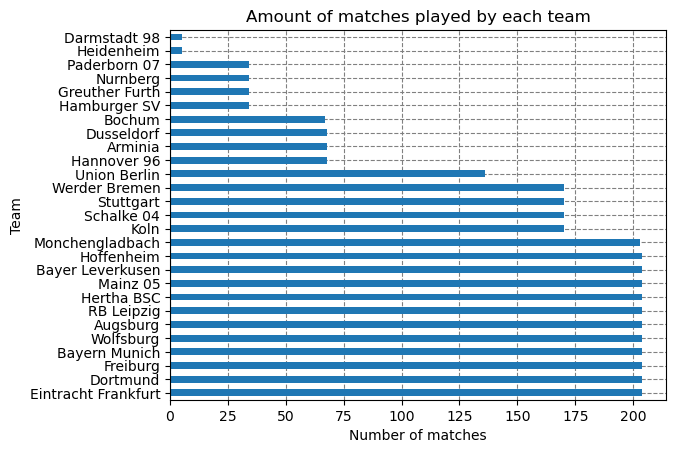

In [5]:
ax = matches_df['team'].value_counts().plot(
    kind='barh',
    title='Amount of matches played by each team',
    xlabel='Number of matches',
    ylabel='Team',
)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.show()

The data shows that more than half of teams have played more than 100 matches.

Each team plays on average 34 matches in a season. If we divide the matches played, we can plot how many seasons out of the 6 scraped seasons each team has played.

## Amount of seasons played by each team

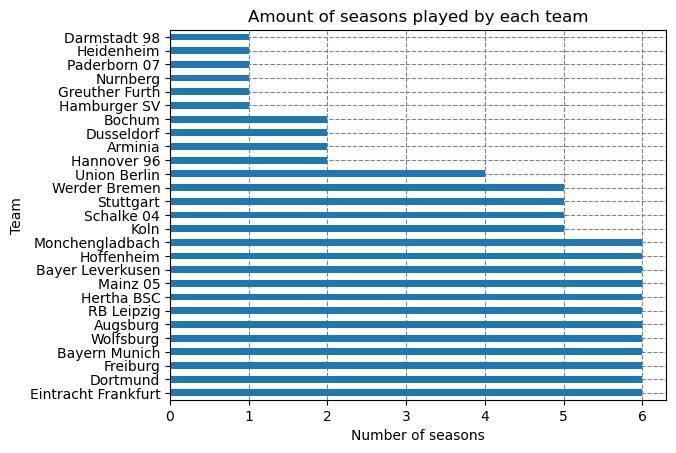

In [6]:
seasons_per_team = matches_df['team'].value_counts().div(34).apply(lambda x: math.ceil(x))
ax = seasons_per_team.plot(
    kind='barh',
    title='Amount of seasons played by each team',
    xlabel='Number of seasons',
    ylabel='Team'
)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.show()

## Goals scored per game for each team

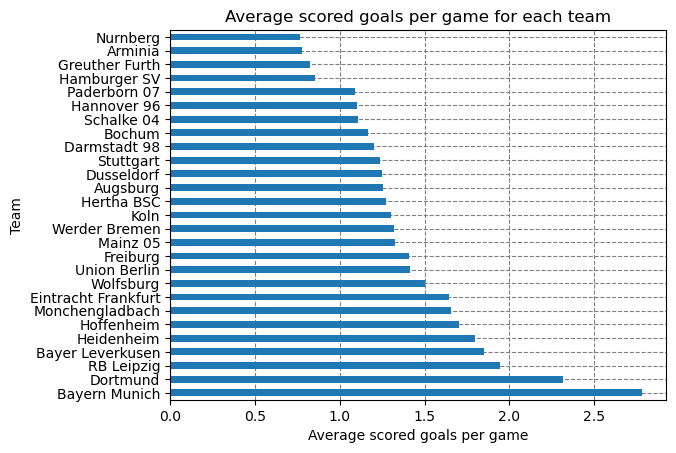

In [7]:
scored_goals_per_game = matches_df.groupby('team')['gf'].mean().sort_values(ascending=False)
ax = scored_goals_per_game.plot(
    kind='barh',
    title='Average scored goals per game for each team',
    xlabel='Average scored goals per game',
    ylabel='Team'
)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.show()

Bayern Munich is an outlier with an average of close to 3 scored goals per game. However, nearly all teams have an average of 1+ goals per game. This can be beneficial for a betting strategy where we bet on `Over 0.5` goals.

## Goals scored and conceded per game for each team


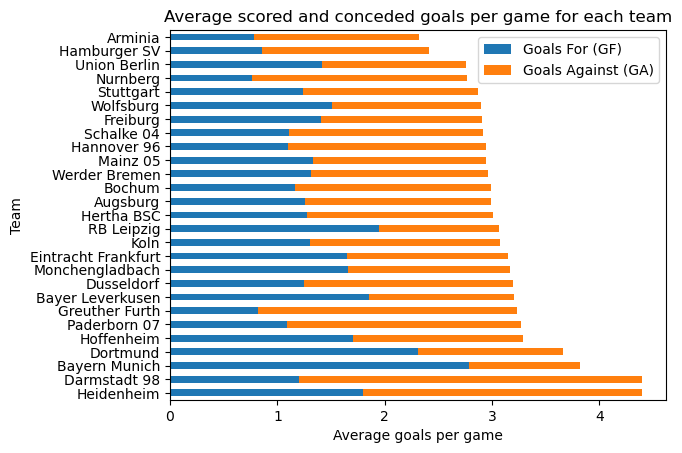

In [8]:
sum_goals_per_team = matches_df.groupby('team')[['gf', 'ga']].mean()
sum_goals_per_team['total_goals'] = sum_goals_per_team['gf'] + sum_goals_per_team['ga']
sorted_teams = sum_goals_per_team.sort_values(by='total_goals', ascending=False)

ax = sorted_teams[['gf', 'ga']].plot.barh(
    stacked=True,
    title='Average scored and conceded goals per game for each team',
    xlabel='Average goals per game',
    ylabel='Team',
)
ax.legend(['Goals For (GF)', 'Goals Against (GA)'])
plt.show()

Another interesting observation is that **all teams** on average play games with more than 2 goals. This can be beneficial for a betting strategy where we bet on `Over 1.5` goals.

## Amount of matches with <2 goals and ones with >=2 goals.


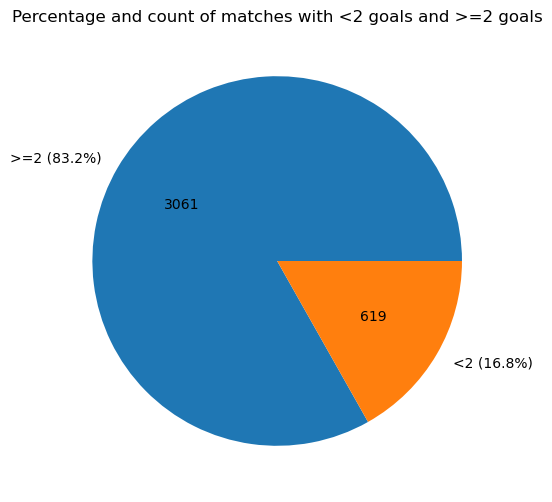

In [9]:
temp_df = matches_df.copy()
temp_df['total_goals'] = temp_df['gf'] + temp_df['ga']
temp_df['total_goals'] = temp_df['total_goals'].apply(lambda x: '>=2' if x >= 2 else '<2')

value_counts = temp_df['total_goals'].value_counts()
total_matches = len(temp_df)
percentages = (value_counts / total_matches) * 100
labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(value_counts.index, percentages)]

plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=labels, autopct=lambda p: '{:.0f}'.format(p * value_counts.sum() / 100))
plt.title('Percentage and count of matches with <2 goals and >=2 goals')
plt.show()

A remarkable 83% of matches have 2+ goals. This can be beneficial for a betting strategy where we bet on `Over 1.5` goals.

## Amount of matches where both teams have scored and where only one team has scored.

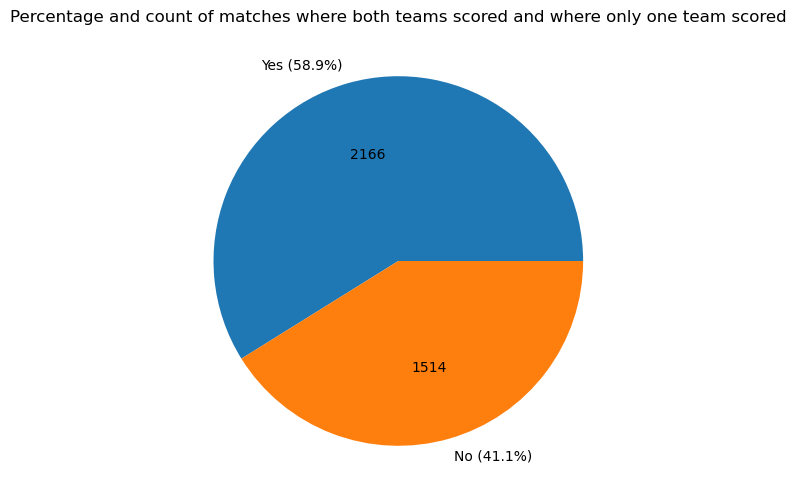

In [10]:
temp_df = matches_df.copy()
temp_df['both_teams_scored'] = temp_df['gf'].apply(lambda x: 1 if x > 0 else 0) + temp_df['ga'].apply(lambda x: 1 if x > 0 else 0)
temp_df['both_teams_scored'] = temp_df['both_teams_scored'].apply(lambda x: 'Yes' if x == 2 else 'No')

value_counts = temp_df['both_teams_scored'].value_counts()
total_matches = len(temp_df)
percentages = (value_counts / total_matches) * 100
labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(value_counts.index, percentages)]

plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=labels, autopct=lambda p: '{:.0f}'.format(p * value_counts.sum() / 100))
plt.title('Percentage and count of matches where both teams scored and where only one team scored')
plt.show()

Only 59% of matches have both teams scoring. Randomly betting on `Both Teams To Score` would not be profitable.

## Correlation between attendance and scored goals in a match(sum of gf and ga)

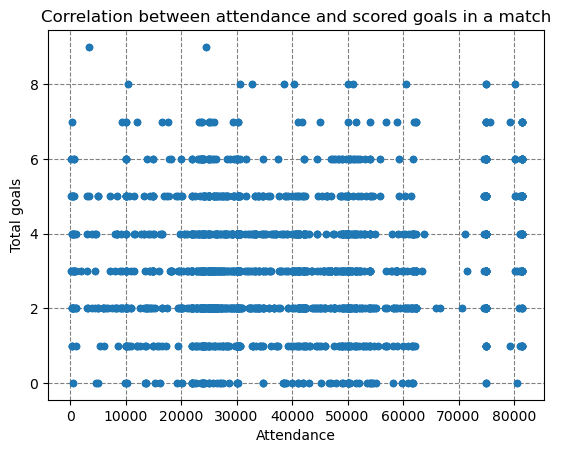

In [11]:
temp_df = matches_df.copy()
temp_df['total_goals'] = temp_df['gf'] + temp_df['ga']
ax = temp_df.plot.scatter(x='attendance', y='total_goals', title='Correlation between attendance and scored goals in a match')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.xlabel('Attendance')
plt.ylabel('Total goals')
plt.show()

No correlation is observed between attendance and scored goals in a match.

## Distribution of matches by the day of the week

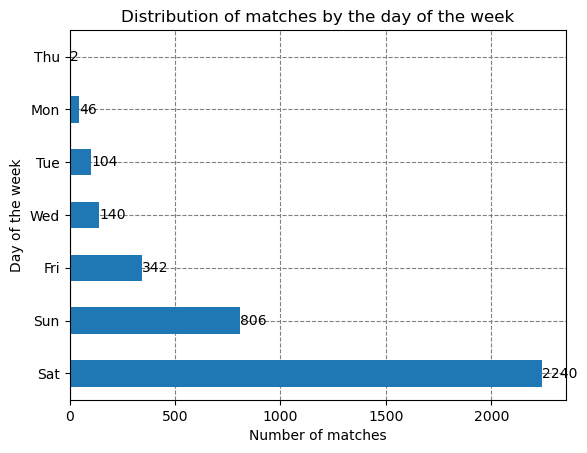

In [17]:
ax = matches_df['day'].value_counts().plot(
    kind='barh',
    title='Distribution of matches by the day of the week',
    xlabel='Number of matches',
    ylabel='Day of the week',
)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.bar_label(ax.containers[0])
plt.show()

A majority of matches are played on the weekend (Saturday and Sunday). This is expected since most people are free on the weekend and can attend matches. Thursday and Monday have the least amount of matches.

## Distribution of match outcomes for home matches

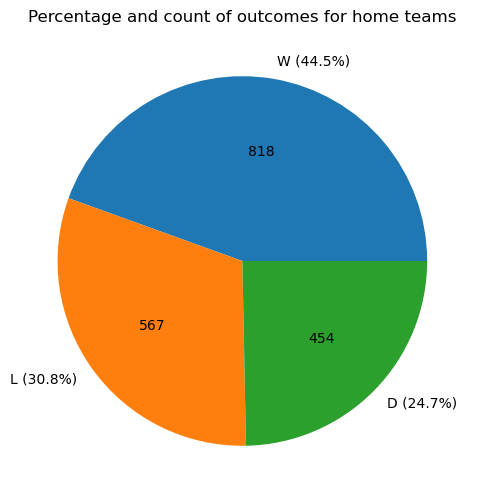

In [21]:
home_matches_df = matches_df[matches_df['venue'] == 'Home']

value_counts = home_matches_df['result'].value_counts()
total_matches = len(home_matches_df)
percentages = (value_counts / total_matches) * 100

labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(value_counts.index, percentages)]

plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=labels, autopct=lambda p: '{:.0f}'.format(p * value_counts.sum() / 100))
plt.title('Percentage and count of outcomes for home teams')
plt.show()

There is a fairly even distribution of match outcomes. Home team has an advantage over the away team.

## Correlation between `gf` and `xg` to see if Opta's expected goals is a good predictor of goals scored

Further information at [https://fbref.com/en/expected-goals-model-explained/](https://fbref.com/en/expected-goals-model-explained/)

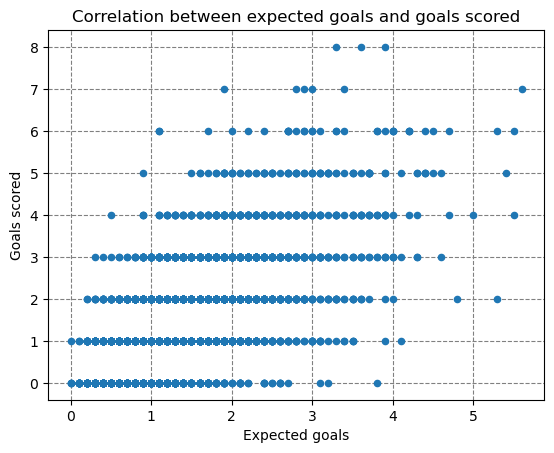

In [22]:
ax = matches_df.plot.scatter(x='xg', y='gf', title='Correlation between expected goals and goals scored')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.xlabel('Expected goals')
plt.ylabel('Goals scored')
plt.show()

## Distribution of possession percentages for home and away teams

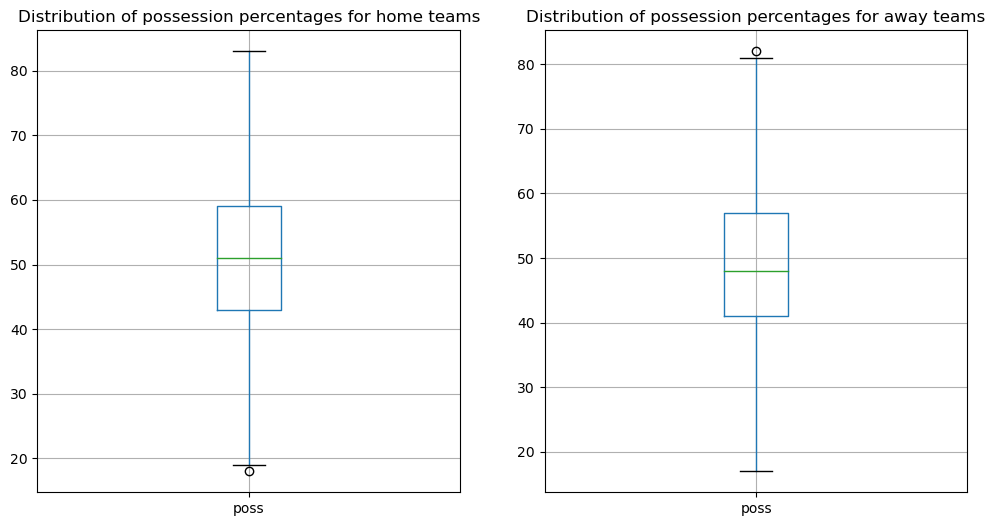

In [26]:
home_matches_df = matches_df[matches_df['venue'] == 'Home']
away_matches_df = matches_df[matches_df['venue'] == 'Away']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
home_matches_df.boxplot(column=['poss'], ax=ax[0])
away_matches_df.boxplot(column=['poss'], ax=ax[1])
ax[0].set_title('Distribution of possession percentages for home teams')
ax[1].set_title('Distribution of possession percentages for away teams')
plt.show()

## Number of tackles for each team

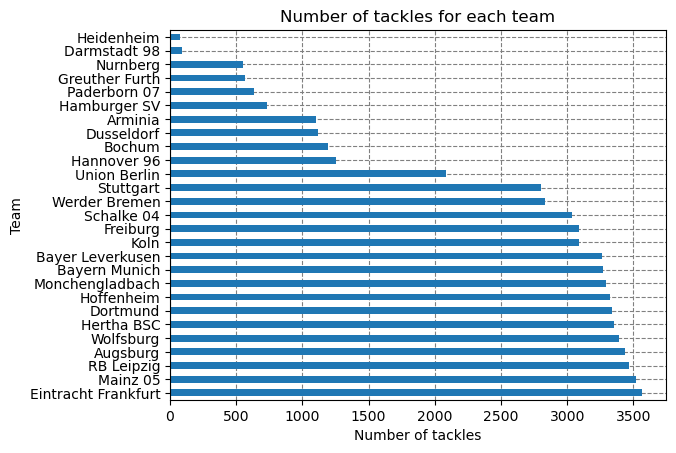

In [29]:
temp_df = matches_df.copy()
temp_df['total_tackles'] = temp_df['defense_tackles_tkl']
temp_df = temp_df.groupby('team')['total_tackles'].sum().sort_values(ascending=False)

ax = temp_df.plot(
    kind='barh',
    title='Number of tackles for each team',
    xlabel='Number of tackles',
    ylabel='Team',
)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.show()